# Proyecto final

### descripcion: Desarrollar un clasificador que permita determinar la salud de un feto a partir de diferentes sintomas que este presenta

# Librerias 

In [129]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model,preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from cubist import Cubist
import random

# Dataset

In [56]:
df =pd.read_csv('https://raw.githubusercontent.com/JohnCastellon/Machine-Learning/main/Proyecto%20Final/fetal_health.csv',sep=",")
df=x=df[["baseline value","accelerations","fetal_movement","uterine_contractions","light_decelerations","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","mean_value_of_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","fetal_health"]]
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,2.0


# Descripción del dataset

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [66]:
df.isnull().any()


baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
fetal_health                                              False
dtype: bool

In [58]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,3.000000


In [59]:
health = df.groupby("fetal_health", as_index=False)['baseline value'].count()
health.head(10)

,fetal_health,baseline value
0,1.0,1655
1,2.0,295
2,3.0,176


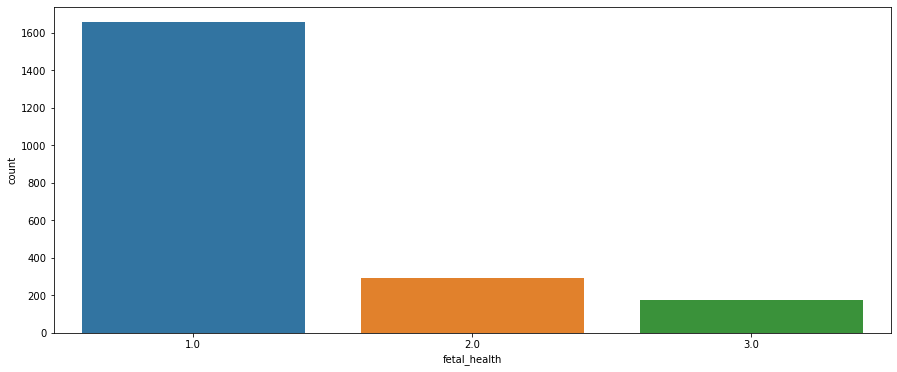

In [60]:
fig,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df['fetal_health'])
plt.show()

In [61]:
from collections import Counter
siz=Counter(df['fetal_health'])

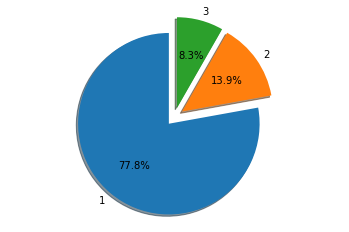

In [62]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1', '2', '3'
sizes = [siz[1.0], siz[2.0], siz[3.0]]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [211]:
#division del dataset
x=df[["baseline value","accelerations","uterine_contractions","severe_decelerations","prolongued_decelerations","abnormal_short_term_variability","percentage_of_time_with_abnormal_long_term_variability"]].values
y=df['fetal_health'].values

# balanceando los datos

In [212]:
def extraer_muestra(x,y,m):
    indices=[i for i in range (len(x))]
    lista=random.sample(indices,m)
    m_x,m_y=[],[]
    for seleccion in lista:
        m_x.append(x[seleccion])
        m_y.append(y[seleccion])
    return (m_x,m_y)

In [213]:
def separador (x,y):
    separado_x=[]
    separado_y=[]
    all_x=[]
    all_y=[]
    for indice in range(len(x)):
        if y[indice]==1:
            separado_x.append(x[indice])
            separado_y.append(y[indice])
        else:
            all_x.append(x[indice])
            all_y.append(y[indice])
            
    return (separado_x,separado_y,all_x,all_y)

In [214]:
x_1,y_1,x_2,y_2=separador(x,y)

In [215]:
len(x_1),len(x_2)

(1655, 471)

In [216]:
x_1,y_1=extraer_muestra(x_1,y_1,295)

In [217]:
len(x_1),len(y_1)

(295, 295)

In [218]:
xr=x_1+x_2
yr=y_1+y_2

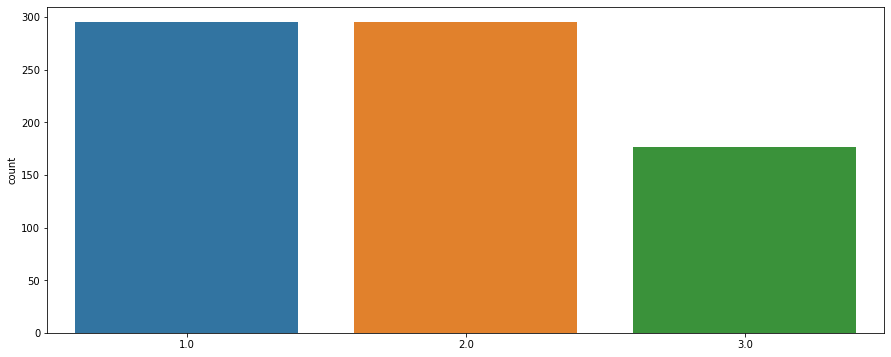

In [219]:
fig,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(yr)
plt.show()

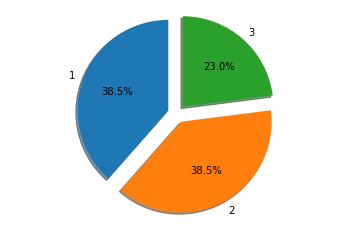

In [283]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizr=Counter(yr)
labels = '1', '2', '3'
sizes = [sizr[1.0], sizr[2.0], sizr[3.0]]
explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Analisis

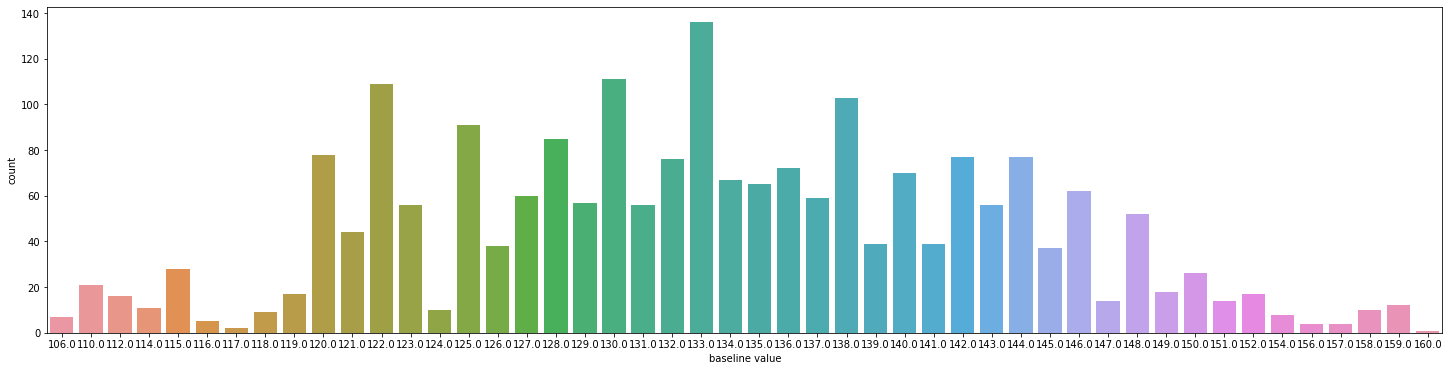

In [267]:
fig,ax = plt.subplots(figsize=(25,6))
ax = sns.countplot(df['baseline value'])
plt.show()

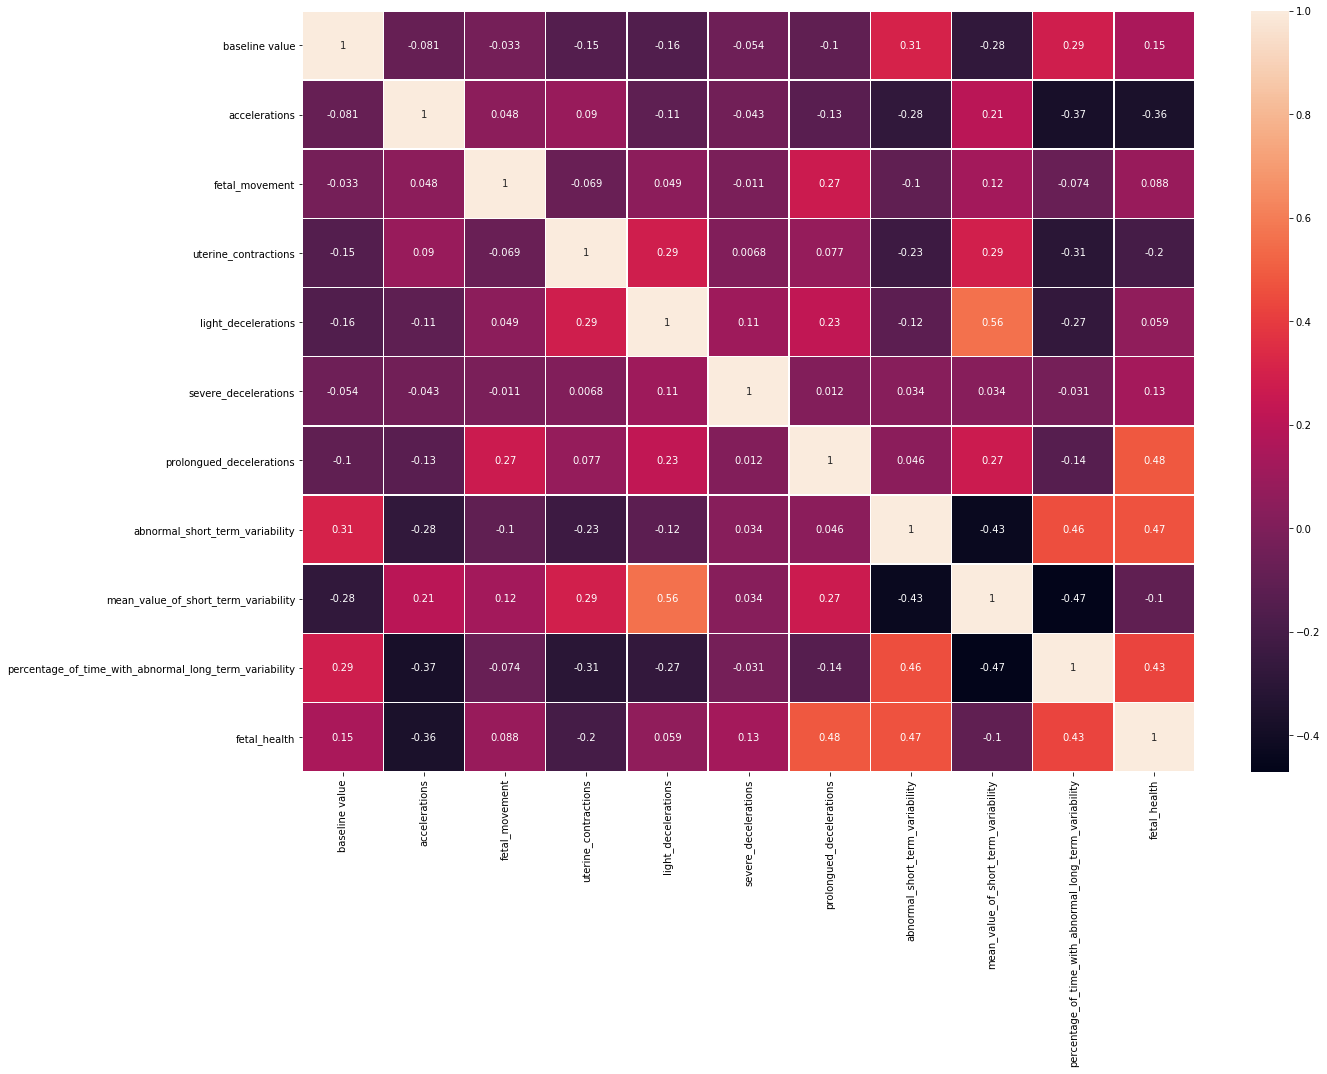

In [138]:
f, ax = plt.subplots(figsize=(20, 14))
mc=df.corr()
sns.heatmap(mc,annot=True,linewidths=.5, ax=ax)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


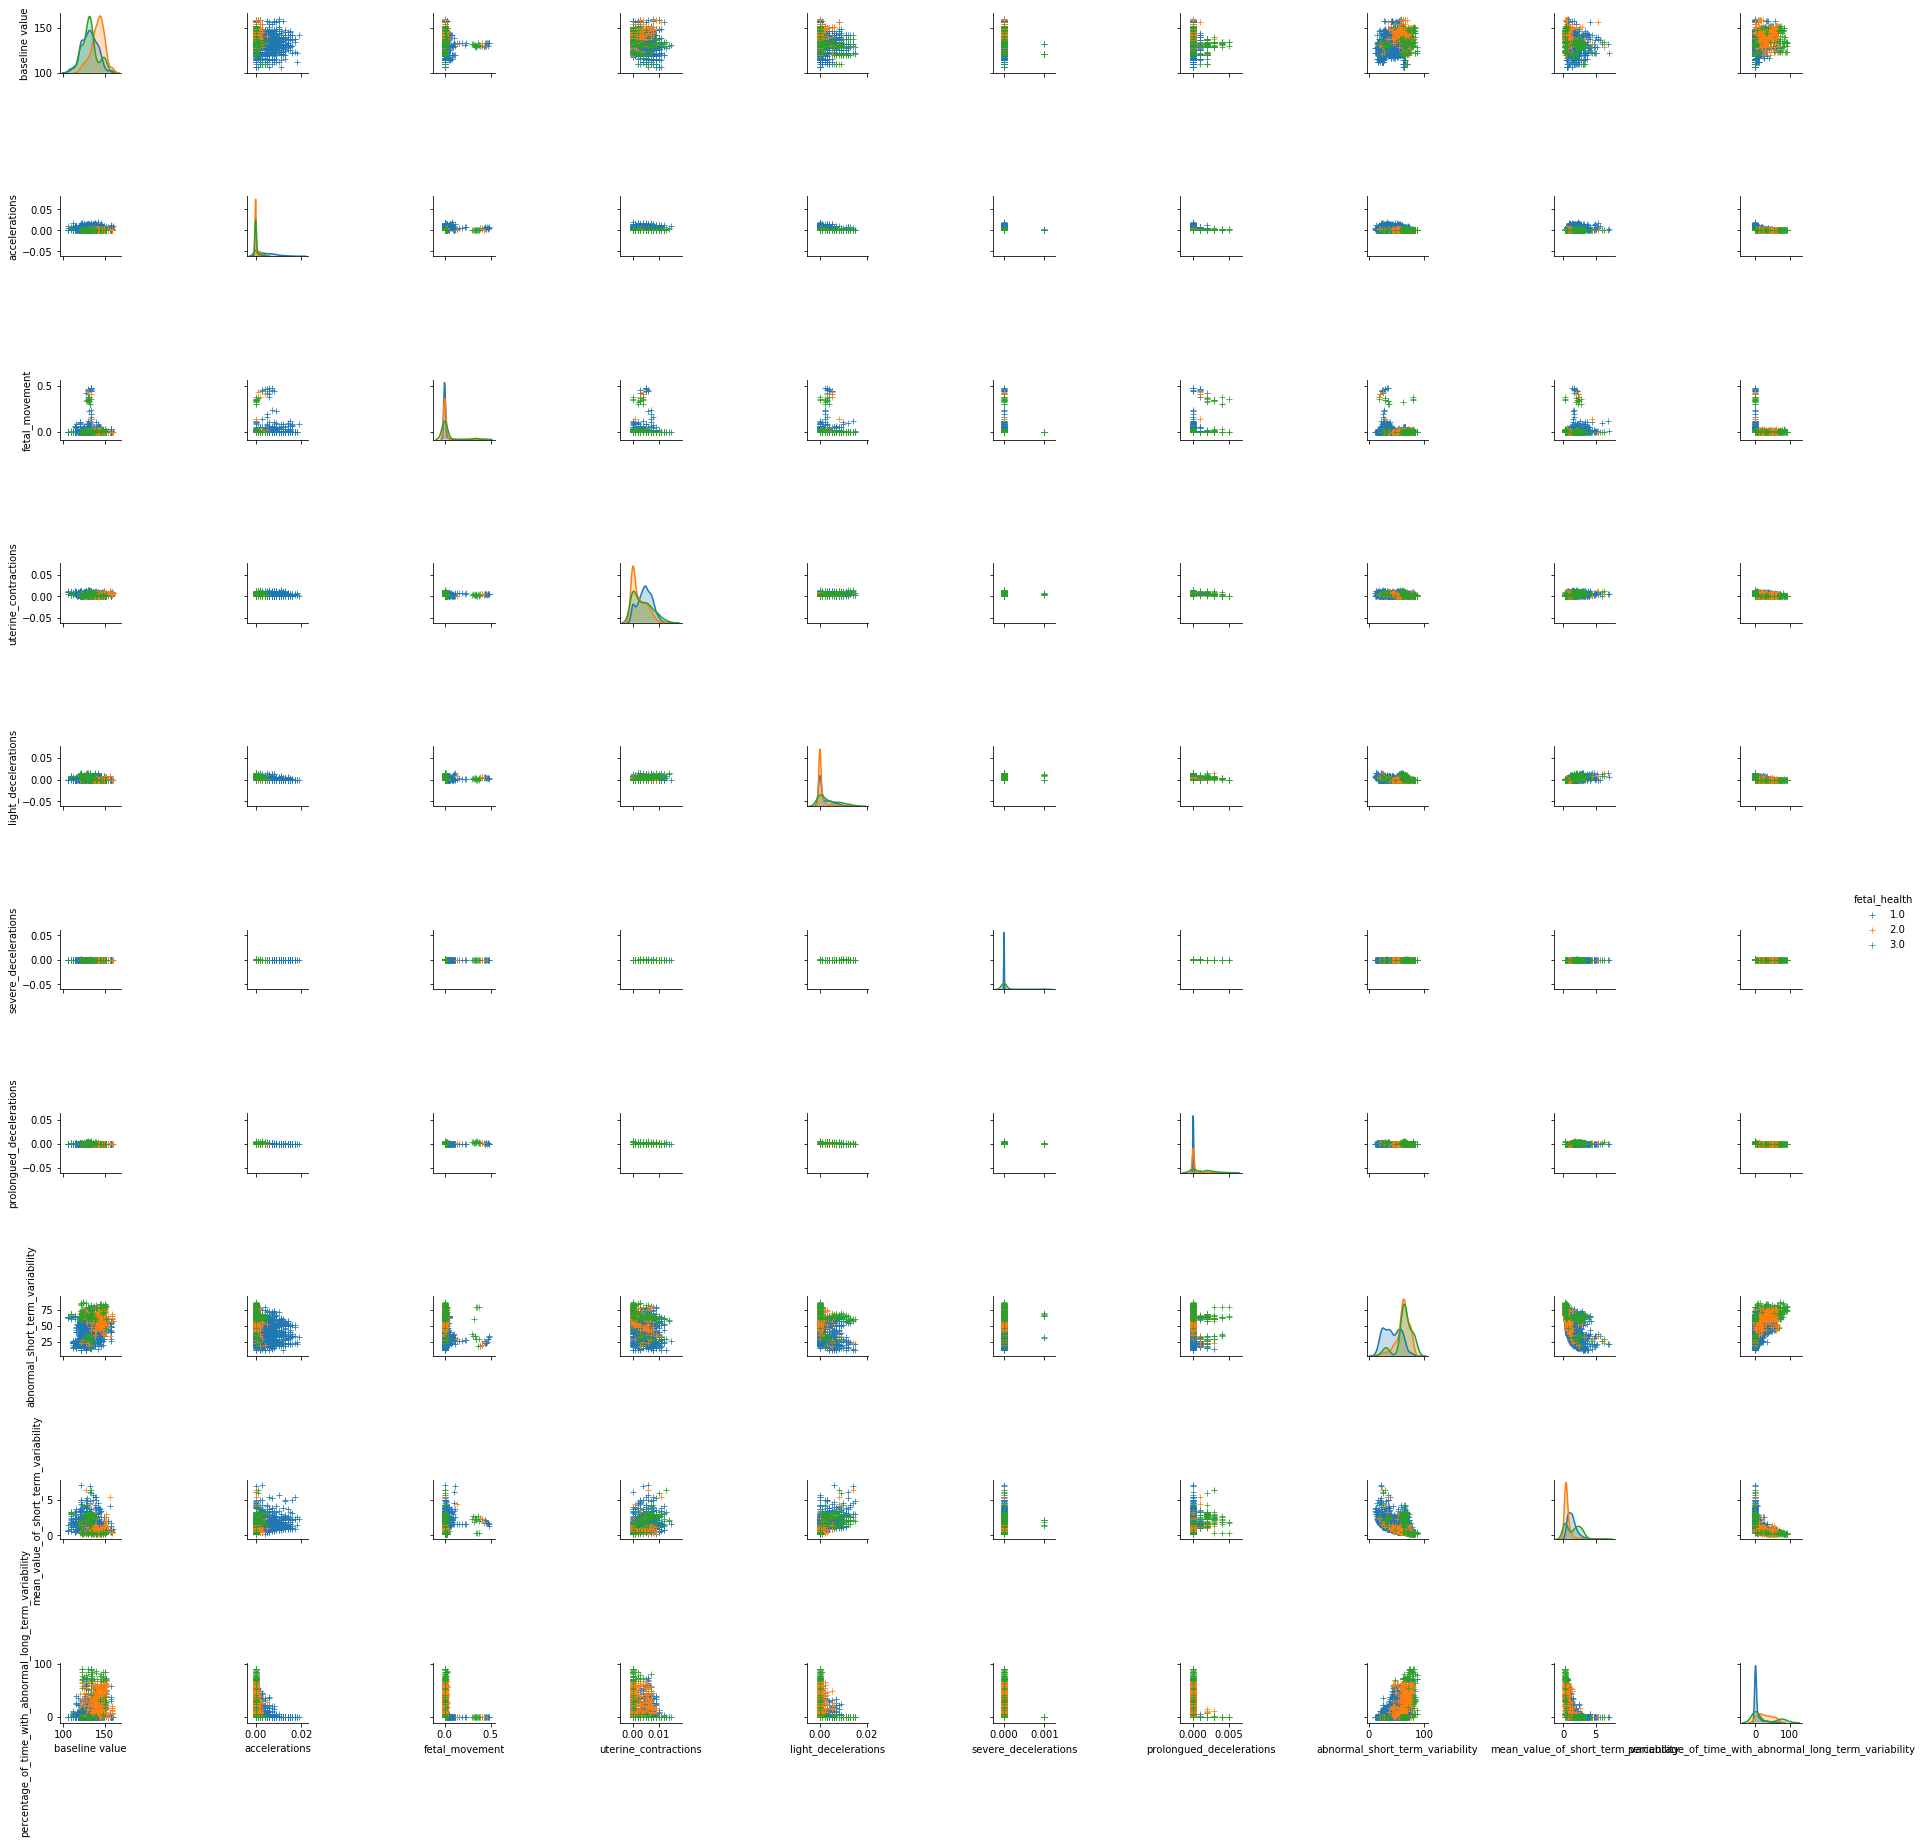

In [282]:
g=sns.pairplot(df,hue='fetal_health',markers='+')
plt.show()

# Entrenamiento

In [220]:
scaler=preprocessing.MinMaxScaler()
xr=scaler.fit_transform(xr)

In [221]:
x_train, x_test, y_train, y_test = train_test_split(xr,yr,random_state=42, train_size=0.7)

In [222]:
len(x_train),len(x_test),len(y_train),len(y_test)

(536, 230, 536, 230)

In [223]:
print('**Sample train:', sorted(Counter(y_train).items()))

**Sample train: [(1.0, 207), (2.0, 197), (3.0, 132)]


In [224]:
print('**Sample test:', sorted(Counter(y_test).items()))

**Sample test: [(1.0, 88), (2.0, 98), (3.0, 44)]


In [225]:
ros_train = RandomOverSampler(random_state=1000)
x_train, y_train = ros_train.fit_resample(x_train, y_train)

ros_test = RandomOverSampler(random_state=1000)
x_test, y_test = ros_test.fit_resample(x_test, y_test)

In [226]:
#Softmax funtion
regs=linear_model.LogisticRegression(multi_class="multinomial",solver="lbfgs",C=1,max_iter=10000)
regs.fit(x_train,y_train)
y_prob=regs.predict(x_test)


In [227]:
classification = classification_report(y_test, y_prob)
print(classification)

              precision    recall  f1-score   support

         1.0       0.78      0.92      0.84        98
         2.0       0.83      0.72      0.77        98
         3.0       0.79      0.74      0.77        98

    accuracy                           0.80       294
   macro avg       0.80      0.80      0.79       294
weighted avg       0.80      0.80      0.79       294



In [228]:
confusion_matrix(y_test,y_prob)

array([[90,  4,  4],
       [12, 71, 15],
       [14, 11, 73]])

In [264]:
print('Accuracy : ', accuracy_score(y_prob,y_test))
print('Recall_score : ', recall_score(y_prob,y_test,average="macro"))
print('Precision_score : ', precision_score(y_prob,y_test,average="weighted"))
print('Puntuación F1 : ', f1_score(y_prob,y_test,average="micro"))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_prob))

Accuracy :  0.7959183673469388
Recall_score :  0.7983072417279732
Precision_score :  0.8073719283631821
Puntuación F1 :  0.7959183673469388
Mean squared error: 0.39


In [230]:
#Cubist
model = Cubist() 
model.fit(x_train, y_train)
y_probc=model.predict(x_test)

/home/student10/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Cubist was fitted with feature names
  warnings.warn(


In [231]:
for x in range(len(y_probc)):
    y_probc[x]=round(y_probc[x],0)

In [232]:
classificationc = classification_report(y_test, y_probc)
print(classificationc)

              precision    recall  f1-score   support

         1.0       0.73      0.84      0.78        98
         2.0       0.73      0.77      0.75        98
         3.0       0.94      0.74      0.83        98

    accuracy                           0.78       294
   macro avg       0.80      0.78      0.78       294
weighted avg       0.80      0.78      0.78       294



In [262]:
print('Accuracy : ', accuracy_score(y_probc,y_test))
print('Recall_score : ', recall_score(y_probc,y_test,average="macro"))
print('Precision_score : ', precision_score(y_probc,y_test,average="weighted"))
print('Puntuación F1 : ', f1_score(y_probc,y_test,average="micro"))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_probc))

Accuracy :  0.782312925170068
Recall_score :  0.7965721641724736
Precision_score :  0.787345550465084
Puntuación F1 :  0.782312925170068
Mean squared error: 0.35


In [234]:
#Random Forest
rfm=RandomForestClassifier()
rfm.fit(x_train,y_train)
y_probrf=rfm.predict(x_test)

In [235]:
classificationrf = classification_report(y_test, y_probrf)
print(classificationrf)

              precision    recall  f1-score   support

         1.0       0.83      0.93      0.87        98
         2.0       0.85      0.81      0.83        98
         3.0       0.92      0.86      0.89        98

    accuracy                           0.86       294
   macro avg       0.87      0.86      0.86       294
weighted avg       0.87      0.86      0.86       294



In [236]:
confusion_matrix(y_test,y_probrf)

array([[91,  7,  0],
       [12, 79,  7],
       [ 7,  7, 84]])

In [265]:
print('Accuracy : ', accuracy_score(y_probrf,y_test))
print('Recall_score : ', recall_score(y_probrf,y_test,average="macro"))
print('Precision_score : ', precision_score(y_probrf,y_test,average="weighted"))
print('Puntuación F1 : ', f1_score(y_probrf,y_test,average="micro"))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_probrf))

Accuracy :  0.8639455782312925
Recall_score :  0.8666040053136829
Precision_score :  0.8677287241427184
Puntuación F1 :  0.8639455782312925
Mean squared error: 0.21


# Prueba parametrica

In [295]:
from scipy.stats import ttest_ind,norm

stat, p = ttest_ind(y_test, y_prob) 
statc, pc = ttest_ind(y_test, y_probc) 
statrf, prf = ttest_ind(y_test, y_probrf) 
print(f'Softmax \nEstadísticas: {stat}, pagina: {p}')
if p > 0.05:print('Misma distribución (no se rechaza H0)')
else:print('Distribución diferente (rechazar H0)')
    
print(f'Cubist \nEstadísticas: {statc}, pagina: {pc}')
if pc > 0.05:print('Misma distribución (no se rechaza H0)')
else:print('Distribución diferente (rechazar H0)')
    
print(f'Random Forest \nEstadísticas: {statrf}, pagina: {prf}')
if prf > 0.05:print('Misma distribución (no se rechaza H0)')
else:print('Distribución diferente (rechazar H0)')    

Softmax 
Estadísticas: 1.7950422004202569, pagina: 0.0736739942762094
Misma distribución (no se rechaza H0)
Cubist 
Estadísticas: 1.7857609297969324, pagina: 0.07465497687754982
Misma distribución (no se rechaza H0)
Random Forest 
Estadísticas: 0.9534351379907856, pagina: 0.3407627549194798
Misma distribución (no se rechaza H0)


# Prueba no parametrica

In [261]:
from scipy.stats import mannwhitneyu

estadística, pag = mannwhitneyu(y_test, y_prob)
estadísticac, pagc = mannwhitneyu(y_test, y_probc)
estadísticarf, pagrf = mannwhitneyu(y_test, y_probrf)

print(f'Softmax \nEstadísticas: {estadística}, pagina: {pag}')
if pag > 0.05:print('Misma distribución (no se rechaza H0)')
else:print('Distribución diferente (rechazar H0)')
    
print(f'Cubist \nEstadísticas: {estadísticac}, pagina: {pagc}')
if pagc > 0.05:print('Misma distribución (no se rechaza H0)')
else:print('Distribución diferente (rechazar H0)')
    
print(f'Random Forest \nEstadísticas: {estadísticarf}, pagina: {pagrf}')
if pagrf > 0.05:print('Misma distribución (no se rechaza H0)')
else:print('Distribución diferente (rechazar H0)')

Softmax 
Estadísticas: 40866.0, pagina: 0.1127750336465167
Misma distribución (no se rechaza H0)
Cubist 
Estadísticas: 39788.0, pagina: 0.03854264881357203
Distribución diferente (rechazar H0)
Random Forest 
Estadísticas: 41356.0, pagina: 0.1688008907134982
Misma distribución (no se rechaza H0)


# Cross Validation con random forest

In [241]:
k_fold = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

In [242]:
accuracies_scores = []
recalls_scores = []
precisions_scores = []
f1_scores = []

In [247]:
for train_index, test_index in k_fold.split(x_train, y_train):
    data_train = x_train[train_index]
    target_train = np.array(y_train)[train_index]
    
    data_test = x_train[test_index]
    target_test = np.array(y_train)[test_index]

    rfm.fit(data_train, target_train)
    predict = rfm.predict(data_test)
    # Accuracy
    accuracy = accuracy_score(target_test, predict)
    accuracies_scores.append(accuracy)
    # Recall
    recall = recall_score(target_test, predict, average='macro')
    recalls_scores.append(recall)
    # Precision
    precision = precision_score(target_test, predict, average='weighted')
    precisions_scores.append(precision)
    # F1
    f1 = f1_score(target_test, predict, average='weighted')
    f1_scores.append(f1)

In [251]:
average_recall = round(np.mean(recalls_scores) * 100, 2)
average_precision = round(np.mean(precisions_scores) * 100, 2)
average_f1 = round(np.mean(f1_scores) * 100, 2)
average_accuracy = round(np.mean(accuracies_scores) * 100, 2)
y_predict = []
for features in x_test:
    features = features.reshape(1, -1)
    value = rfm.predict(features)[0]
    y_predict.append(value)

classification = classification_report(y_test, y_predict)
confusion = confusion_matrix(y_predict, y_test)
output_result = {'F1-score': average_f1, 'Accuracy': average_accuracy, 'Recall': average_recall, 
                 'Precision': average_precision, 'Classification Report\n': classification, 
                 'Confusion Matrix\n': confusion}

In [252]:
for item, val in output_result.items():
    print('{0} {1}'.format(item, val))

F1-score 88.98
Accuracy 89.04
Recall 89.27
Precision 89.23
Classification Report
               precision    recall  f1-score   support

         1.0       0.82      0.92      0.87        98
         2.0       0.86      0.85      0.86        98
         3.0       0.90      0.81      0.85        98

    accuracy                           0.86       294
   macro avg       0.86      0.86      0.86       294
weighted avg       0.86      0.86      0.86       294

Confusion Matrix
 [[90  8 12]
 [ 6 83  7]
 [ 2  7 79]]
